In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [4]:
%%time
df = pd.read_csv('train.csv', index_col='ts_id')
df.drop(labels=df.columns[df.isna().any()].tolist(), axis=1, inplace=True)

CPU times: user 33.6 s, sys: 2.17 s, total: 35.7 s
Wall time: 35.8 s


In [11]:
anon_features = [col for col in df.columns if 'feature' in col]
xfeats = anon_features + ['date', 'weight']

In [9]:
y = df.resp.values

0.026936080402540516

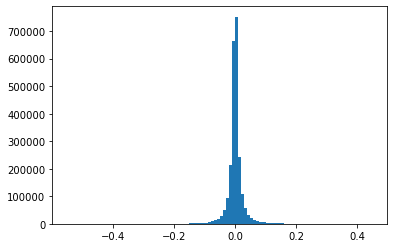

In [49]:
plt.hist(y, bins=100)
np.std(y)

In [12]:
X = df[xfeats].values

In [16]:
%%time
d_train = xgb.DMatrix(X, y)

CPU times: user 3.15 s, sys: 33.5 ms, total: 3.18 s
Wall time: 515 ms


In [24]:
parameters = {'random_state': 42,
             # 'tree_method': 'gpu_hist',
              'eval_metric': 'auc',
              'objective': 'reg:linear'}

In [52]:
%%time
clf = xgb.train(parameters, d_train, 15)
yy = clf.predict(d_train)
np.sum((y - yy) ** 2) / len(yy)

[22:33:31] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 7min 38s, sys: 1.05 s, total: 7min 39s
Wall time: 38.4 s


0.0006867116755377992